# Introduction aux images numériques

Une image numérique est simplement un **tableau multidimensionnel** où chaque élément représente l'intensité lumineuse (ou couleur) d'un pixel. Comprendre comment les images sont stockées et manipulées en tant que données est fondamental pour le traitement d'images.

---

## Ce que vous apprendrez

- Les **dimensions** et les **canaux** d'une image
- Comment accéder aux **canaux RGB** individuels
- Les opérations de **bruit** et leur impact sur les images
- Les **filtres de lissage** (flou gaussien) et la détection de contours

In [1]:
# Importation des bibliothèques nécessaires
import numpy as np                    # Manipulation de tableaux numériques
from skimage import data              # Accès aux images d'exemple de scikit-image
import matplotlib.pyplot as plt        # Visualisation d'images

---

## Les images couleur : structure RGB

Une image couleur est composée de **trois canaux** :
- **R (Red)** : intensité du rouge
- **G (Green)** : intensité du vert
- **B (Blue)** : intensité du bleu

Chaque canal est une matrice 2D indépendante. Une image couleur est donc un tableau **3D** de dimensions `(hauteur, largeur, 3)`.

In [2]:
# Charger une image couleur d'exemple
img_arr = data.astronaut()

# Afficher les propriétés de l'image
print('Shape (dimensions):', img_arr.shape)  # (hauteur, largeur, canaux)
print('Data type:', img_arr.dtype)            # Type de données des pixels

# Analyser les statistiques de l'image globale
print('\nStatistiques globales:')
print('  Min:', np.min(img_arr), '| Max:', np.max(img_arr))
print('  Moyenne:', np.average(img_arr), '| Écart-type:', np.std(img_arr))

# Analyser chaque canal RGB séparément
print('\nStatistiques par canal:')
print('  R (canal 0) - Mean:', np.average(img_arr[:,:,0]), '| Std:', np.std(img_arr[:,:,0]))
print('  G (canal 1) - Mean:', np.average(img_arr[:,:,1]), '| Std:', np.std(img_arr[:,:,1]))
print('  B (canal 2) - Mean:', np.average(img_arr[:,:,2]), '| Std:', np.std(img_arr[:,:,2]))

Shape (dimensions): (512, 512, 3)
Data type: uint8

Statistiques globales:
  Min: 0 | Max: 255
  Moyenne: 114.59900410970052 | Écart-type: 81.23036724707771

Statistiques par canal:
  R (canal 0) - Mean: 141.56249237060547 | Std: 82.03894198148765
  G (canal 1) - Mean: 105.75944519042969 | Std: 76.61546115996879
  B (canal 2) - Mean: 96.4750747680664 | Std: 77.85342948916895


---

## Visualisation des canaux RGB

Chaque canal peut être isolé en mettant les autres canaux à zéro. Cela permet de voir comment chaque couleur contribue à l'image finale.

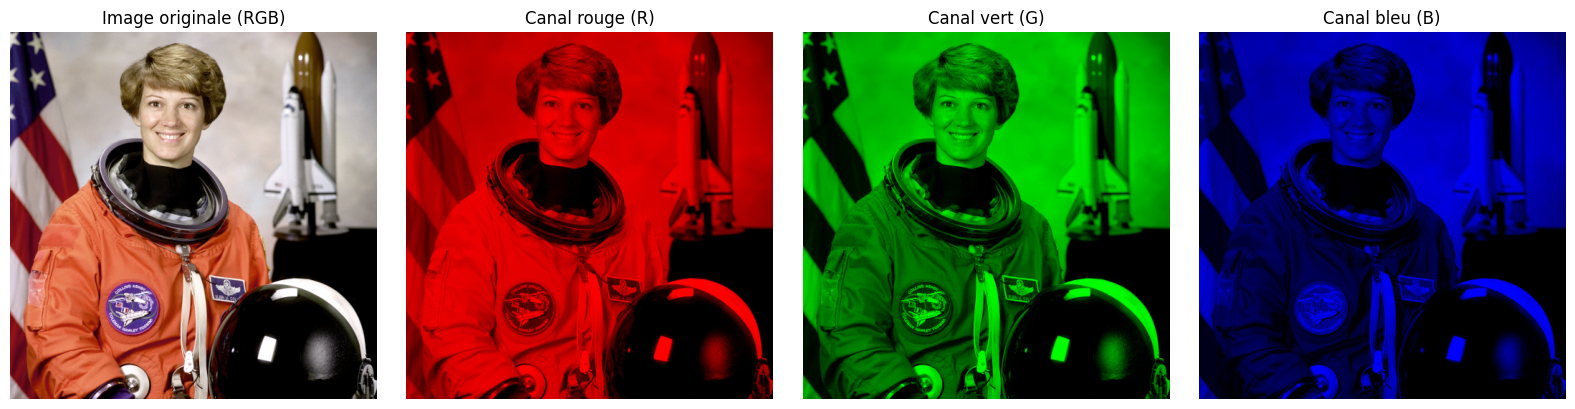

In [3]:
# Créer une figure avec 4 sous-graphiques
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

# 1. Image originale (RGB)
axs[0].imshow(img_arr)
axs[0].set_title("Image originale (RGB)")
axs[0].axis('off')

# 2. Canal Rouge uniquement - mettre les canaux G et B à zéro
tmp_arr = img_arr.copy()
tmp_arr[:,:,1:3] = 0
axs[1].imshow(tmp_arr)
axs[1].set_title("Canal rouge (R)")
axs[1].axis('off')

# 3. Canal Vert uniquement - mettre les canaux R et B à zéro (indices 0 et 2)
tmp_arr = img_arr.copy()
tmp_arr[:,:,0:3:2] = 0
axs[2].imshow(tmp_arr)
axs[2].set_title("Canal vert (G)")
axs[2].axis('off')

# 4. Canal Bleu uniquement - mettre les canaux R et G à zéro
tmp_arr = img_arr.copy()
tmp_arr[:,:,0:2] = 0
axs[3].imshow(tmp_arr)
axs[3].set_title("Canal bleu (B)")
axs[3].axis('off')

fig.tight_layout()
plt.show()

---

## Traitement des canaux : conversion en niveaux de gris

Une image couleur peut être convertie en **niveaux de gris** en calculant la moyenne des trois canaux RGB. Chaque pixel devient alors une valeur unique au lieu de trois.

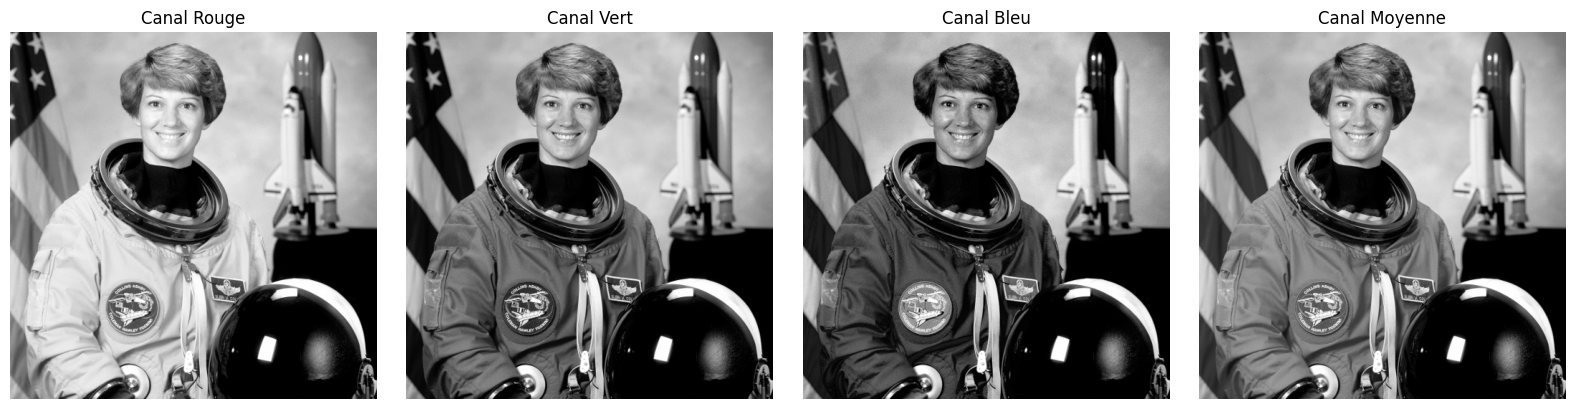

In [4]:
# Convertir l'image couleur en niveaux de gris (moyenne des trois canaux)
gray_arr = np.average(img_arr, axis=-1)

# Créer une image avec tous les canaux visualisés individuellement
concat_arr = np.append(img_arr, np.expand_dims(gray_arr, axis=-1), axis=-1)

# Afficher chaque canal
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i, ax in enumerate(axs):
    # Afficher le i-ème canal en niveaux de gris
    im = ax.imshow(concat_arr[:,:, i], cmap='gray')
    titles = ['Rouge', 'Vert', 'Bleu', 'Moyenne']
    ax.set_title(f"Canal {titles[i]}")
    ax.axis('off')

fig.tight_layout()
plt.show()

---

## Ajout de bruit : analyse de la corrélation

Le **bruit** est une variation aléatoire des intensités de pixels. Ajouter du bruit à une image diminue la **corrélation** avec l'image originale. La corrélation est une mesure de similitude : 1.0 signifie identique, 0.0 signifie aucune relation.

Niveau de bruit 0: Corrélation = 1.0
Niveau de bruit 1: Corrélation = 0.9325
Niveau de bruit 2: Corrélation = 0.7909
Niveau de bruit 3: Corrélation = 0.6532


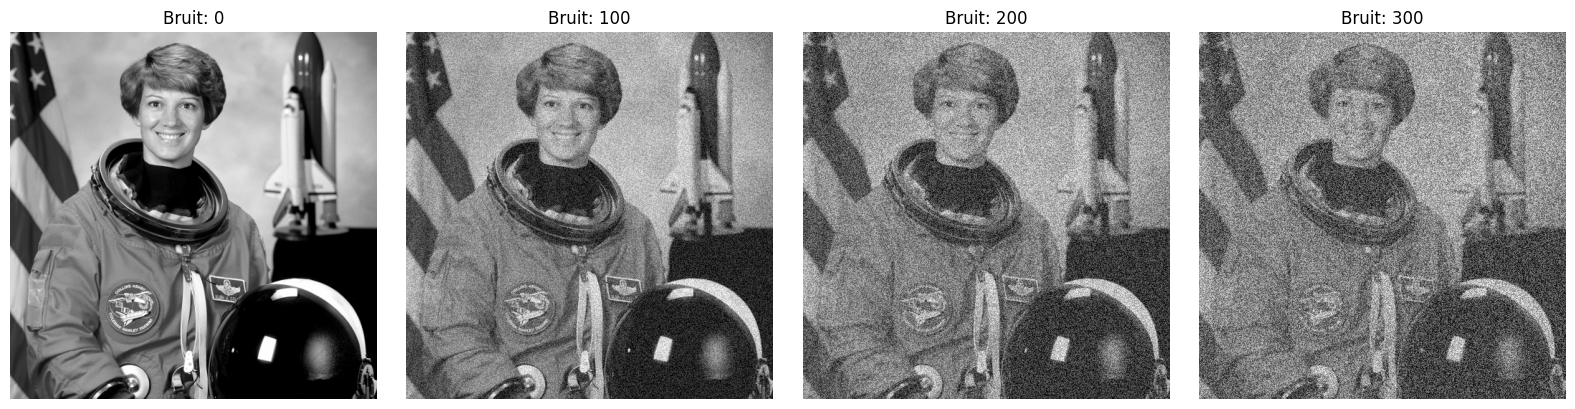

In [5]:
# Ajouter différents niveaux de bruit à l'image en niveaux de gris
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

for i, ax in enumerate(axs):
    # Générer du bruit aléatoire avec intensité proportionnelle à i
    noise = np.random.random(gray_arr.shape) * (100 * i)
    noisy_image = gray_arr + noise
    
    # Afficher l'image bruitée
    im = ax.imshow(noisy_image, cmap='gray')
    ax.set_title(f"Bruit: {100*i}")
    ax.axis('off')
    
    # Calculer la corrélation entre l'image originale et l'image bruitée
    # np.corrcoef retourne une matrice 2x2 de corrélations
    correlation = np.corrcoef(gray_arr.ravel(), noisy_image.ravel())[0, 1]
    correlation = np.round(correlation, 4)
    
    print(f"Niveau de bruit {i}: Corrélation = {correlation}")

fig.tight_layout()
plt.show()

---

## Lissage avec filtre gaussien

Le **filtre gaussien** est un filtre de convolution qui **lisse** une image en moyennant les pixels voisins selon une distribution gaussienne. Cela réduit le bruit et les détails fins.

Le paramètre **sigma** contrôle l'intensité du lissage :
- Sigma faible = lissage léger
- Sigma élevé = lissage intense

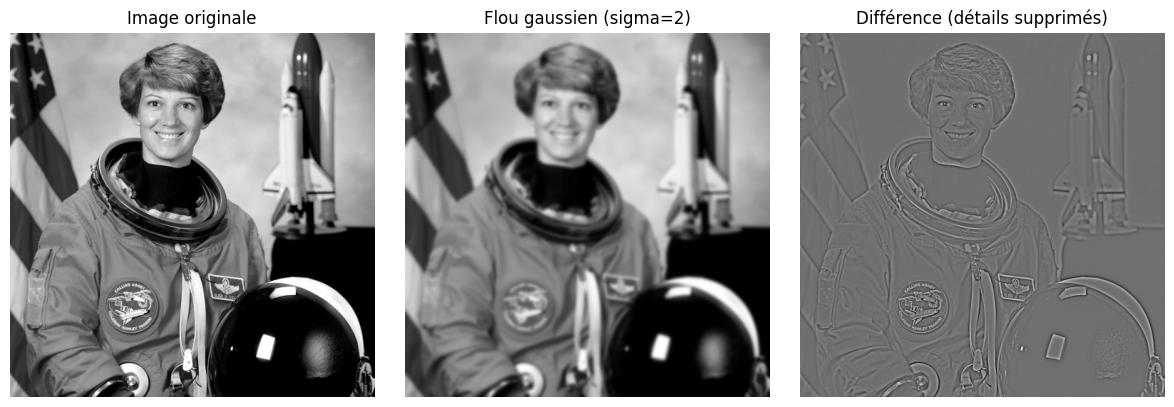

In [6]:
# Importer la fonction de filtre gaussien
from scipy.ndimage import gaussian_filter

# Appliquer le filtre gaussien avec sigma=2
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Image originale
im = axs[0].imshow(gray_arr, cmap='gray')
axs[0].set_title("Image originale")
axs[0].axis('off')

# Image lissée - applique le filtre gaussien avec sigma=2
blurred_arr = gaussian_filter(gray_arr, sigma=2)
im = axs[1].imshow(blurred_arr, cmap='gray')
axs[1].set_title("Flou gaussien (sigma=2)")
axs[1].axis('off')

# Différence entre l'originale et la lissée - montre les détails supprimés
difference = gray_arr - blurred_arr
im = axs[2].imshow(difference, cmap='gray')
axs[2].set_title("Différence (détails supprimés)")
axs[2].axis('off')

fig.tight_layout()
plt.show()

---

## Résumé

- Les images couleur sont des **tableaux 3D** avec trois canaux RGB
- Chaque canal peut être **isolé et analysé** indépendamment
- Le **bruit** réduit la corrélation avec l'image originale
- Le **filtre gaussien** lisse les images en supprimant les détails fins

Prochain chapitre : `d_fun_with_images.ipynb`